<a href="https://colab.research.google.com/github/JaquelineMera/NYC-citi-bikes/blob/main/nyc_citi_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_trips = pd.read_csv('/content/citi_bike_trips.csv')

In [3]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             50000 non-null  int64  
 1   stoptime                 50000 non-null  object 
 2   start_station_id         50000 non-null  int64  
 3   start_station_name       50000 non-null  object 
 4   start_station_latitude   50000 non-null  float64
 5   start_station_longitude  50000 non-null  float64
 6   end_station_id           50000 non-null  int64  
 7   end_station_name         50000 non-null  object 
 8   end_station_latitude     50000 non-null  float64
 9   end_station_longitude    50000 non-null  float64
 10  bikeid                   50000 non-null  int64  
 11  usertype                 50000 non-null  object 
 12  birth_year               45361 non-null  float64
 13  gender                   50000 non-null  object 
 14  customer_plan         

In [4]:
# NULOS
df_trips.isnull().sum()

,0
tripduration,0
stoptime,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0
end_station_longitude,0


In [5]:
# DUPLICADOS
duplicados = df_trips[df_trips.duplicated()]
duplicados

,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan


In [6]:
# NUMERO DUPLICADOS POR COLUMNA
numero_dupli_columnas = df_trips.duplicated(subset=['start_station_id', 'end_station_id', 'bikeid']).sum()
numero_dupli_columnas

50

In [7]:
# NUMERO DUPLICADOS MOSTRAR
duplicados_columna = df_trips[df_trips.duplicated(subset=['start_station_id', 'end_station_id', 'bikeid'])]
duplicados_columna

,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
3877,920,2017-09-14 12:02:37,3443,W 52 St & 6 Ave,40.761330,-73.979820,446,W 24 St & 7 Ave,40.744876,-73.995299,29958,Subscriber,1985.0,female,NaN
4432,998,2017-08-27 16:34:55,3479,Picnic Point,40.685126,-74.025353,3182,Yankee Ferry Terminal,40.686931,-74.016966,15740,Subscriber,1982.0,male,NaN
4465,1168,2017-10-07 18:50:56,3479,Picnic Point,40.685126,-74.025353,3254,Soissons Landing,40.692317,-74.014866,15275,Subscriber,1988.0,male,NaN
7050,7172,2018-04-14 17:02:03,3166,Riverside Dr & W 72 St,40.780578,-73.985624,3166,Riverside Dr & W 72 St,40.780578,-73.985624,32101,Customer,1969.0,unknown,NaN
7548,1653,2015-10-25 14:37:57,3166,Riverside Dr & W 72 St,40.780578,-73.985624,368,Carmine St & 6 Ave,40.730386,-74.002150,22963,Subscriber,1964.0,male,NaN
10670,505,2017-10-01 16:08:26,3430,Richardson St & N Henry St,40.719079,-73.942237,3086,Graham Ave & Conselyea St,40.715143,-73.944507,18478,Subscriber,1988.0,male,NaN
13466,136,2018-01-11 10:23:37,3239,Bressler,40.646538,-74.016588,3239,Bressler,40.646538,-74.016588,22368,Subscriber,1993.0,male,NaN
13467,142,2018-05-01 17:17:49,3239,Bressler,40.646538,-74.016588,3239,Bressler,40.646538,-74.016588,22368,Subscriber,1988.0,male,NaN
14191,1718,2016-07-07 5:59:09,329,Greenwich St & North Moore St,40.720152,-74.010365,329,Greenwich St & North Moore St,40.720152,-74.010365,22651,Subscriber,1962.0,male,NaN
16558,237,2018-04-14 9:11:21,3461,Murray St & Greenwich St,40.714852,-74.011223,387,Centre St & Chambers St,40.712733,-74.004607,14587,Subscriber,1995.0,male,NaN


In [8]:
# MANEJO DE NULOS Y CAMBIO DE SEGUNDOS A MINUTOS
df_trips = df_trips.dropna(subset=['birth_year'])
df_trips = df_trips.drop(columns=['customer_plan'])
df_trips['tripduration'] = df_trips['tripduration'] / 60

# HEADS DE TABLA LIMPIA
df_trips.head()


,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,5.300000,2017-10-01 21:01:53,3480,WS Don't Use,0.0000,0.000000,3214,Essex Light Rail,40.712774,-74.036486,31698,Subscriber,1989.0,male
1,18.316667,2018-02-19 22:55:52,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,30387,Subscriber,1987.0,male
2,23.266667,2017-11-09 17:38:10,3489,Gold St & Frankfort St,40.7107,-74.003541,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,27094,Subscriber,1983.0,male
3,19.683333,2018-05-17 18:16:34,3489,Gold St & Frankfort St,40.7107,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,21360,Subscriber,1991.0,female
4,10.266667,2017-09-17 19:10:21,3489,Gold St & Frankfort St,40.7107,-74.003541,257,Lispenard St & Broadway,40.719392,-74.002472,18785,Subscriber,1998.0,female


In [9]:
df_trips.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
count,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000
mean,14.741371,2717.296995,40.742257,-73.982063,1313.980887,40.741574,-73.984005,23817.961751,1978.215449
std,264.403367,1173.345248,0.195361,0.347769,1324.285253,0.040211,0.017213,5598.386093,11.930613
min,1.000000,151.000000,0.000000,-74.025353,72.000000,40.646538,-74.036486,14529.000000,1885.000000
25%,6.183333,3078.000000,40.727714,-73.995168,376.000000,40.726218,-73.995168,18712.000000,1969.000000
50%,9.900000,3238.000000,40.743116,-73.985624,487.000000,40.742354,-73.986831,24351.000000,1981.000000
75%,16.183333,3427.000000,40.758985,-73.972889,3132.000000,40.758985,-73.974987,28544.000000,1988.000000
max,54566.066667,3686.000000,45.505851,0.000000,3686.000000,45.505851,-73.569109,33671.000000,2002.000000


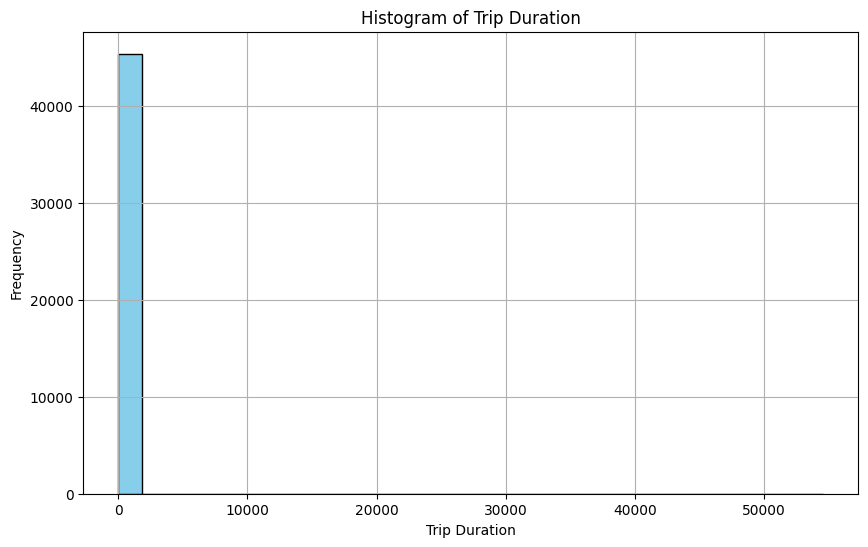

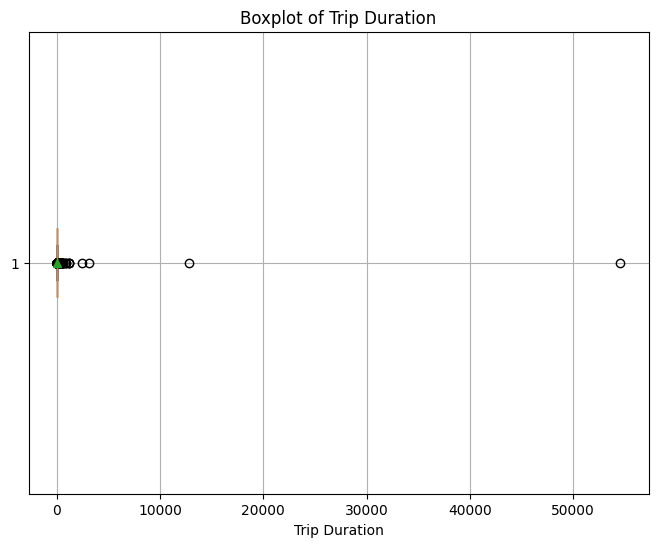

In [10]:
# Histograma de tripduration
plt.figure(figsize=(10, 6))
plt.hist(df_trips['tripduration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot de tripduration
plt.figure(figsize=(8, 6))
plt.boxplot(df_trips['tripduration'], vert=False, patch_artist=True, showmeans=True)
plt.title('Boxplot of Trip Duration')
plt.xlabel('Trip Duration')
plt.grid(True)
plt.show()

In [11]:
# Crear el histograma interactivo - tripduration
fig = px.histogram(df_trips, x='tripduration', nbins=30, title='tripduration')
# Mostrar el histograma
fig.show()
# Crear un boxplot interactivo usando Plotly - Último salario de User info
fig = px.box(df_trips, y='tripduration', points="all", title='tripduration')
# Mostrar el gráfico
fig.show()